In [2]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from hardwares.hardware_params import hardware_params
from model_analyzer import ModelAnalyzer
%load_ext autoreload
%autoreload 2

In [3]:
model_id="meta-llama/Llama-2-13b-hf"
hardware="nvidia_A6000"
analyzer=ModelAnalyzer(model_id,hardware)

use config file configs/Llama.py for meta-llama/Llama-2-13b-hf


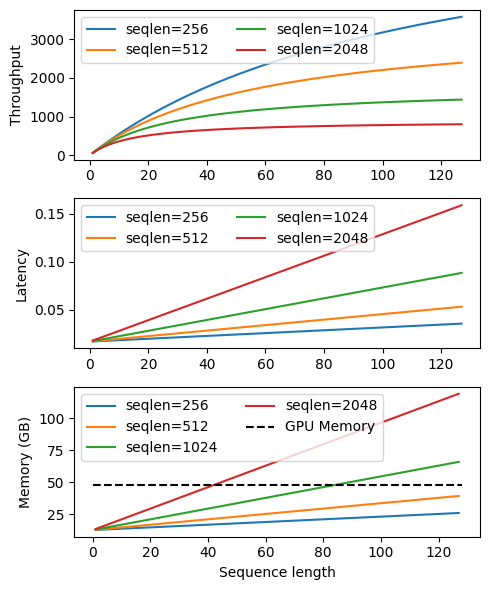

In [52]:
fig=plt.figure(figsize=(5, 6))
plt.subplot(3,1,1)
for seqlen in [256,512,1024,2048]:
    ys=[]
    xs=[]
    for batchsize in range(1,128):
        result=analyzer.analyze(seqlen,batchsize,8,8,8)
        # result=analyzer.analyze(seqlen,batchsize,16,16,16,use_flashattention=True)
        inference_time=result["total_results"]["decode"]["inference_time"]
        throughput=batchsize/inference_time
        ys.append(throughput)
        # ys.append(inference_time)
        xs.append(batchsize)
    plt.plot(xs,ys,label=f"seqlen={seqlen}")
plt.legend(ncol=2)
plt.ylabel("Throughput")
# plt.xlabel("Sequence length")

plt.subplot(3,1,2)
for seqlen in [256,512,1024,2048]:
    ys=[]
    xs=[]
    for batchsize in range(1,128):
        # result=analyzer.analyze(seqlen,batchsize,16,16,16,use_flashattention=True)
        result=analyzer.analyze(seqlen,batchsize,8,8,8)
        inference_time=result["total_results"]["decode"]["inference_time"]
        # inference_time=result["total_results"]["decode"]["memory_consumption"]/1e9
        throughput=batchsize/inference_time
        # ys.append(throughput)
        ys.append(inference_time)
        xs.append(batchsize)
    plt.plot(xs,ys,label=f"seqlen={seqlen}")
plt.legend(ncol=2)
plt.ylabel("Latency")
# plt.xlabel("Sequence length")


plt.subplot(3,1,3)
for seqlen in [256,512,1024,2048]:
    ys=[]
    xs=[]
    for batchsize in range(1,128):
        # result=analyzer.analyze(seqlen,batchsize,16,16,16,use_flashattention=True)
        result=analyzer.analyze(seqlen,batchsize,8,8,8)
        # inference_time=result["total_results"]["decode"]["inference_time"]
        inference_time=result["total_results"]["decode"]["memory_consumption"]/1e9
        throughput=batchsize/inference_time
        # ys.append(throughput)
        ys.append(inference_time)
        xs.append(batchsize)
    plt.plot(xs,ys,label=f"seqlen={seqlen}")
plt.hlines(48,0,128,linestyles="dashed",label="GPU Memory",colors="black")
plt.legend(ncol=2)
plt.ylabel("Memory (GB)")
plt.xlabel("Sequence length")

plt.tight_layout()
plt.savefig("../output/parallel_serving.pdf",bbox_inches='tight')